## Installing required packages

In [1]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


## Importing required Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, SVD, Dataset
from surprise.model_selection import cross_validate

## Reading Movie Ratings Dataset

In [3]:
ratings_df = pd.read_csv('../input/ratings_small.csv')

In [4]:
ratings_df.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [5]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


##  Recommendation System with Probabilistic Matrix Function

In [6]:
reader = Reader(line_format = 'user item rating', rating_scale = (0, 5))
data   = Dataset.load_from_df(ratings_df[["userId", "movieId", "rating"]], reader)
svd    = SVD(biased = False)
model  = cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0191  1.0121  1.0258  1.0258  1.0207  1.0207  0.0051  
MAE (testset)     0.7821  0.7793  0.7904  0.7885  0.7900  0.7861  0.0045  
Fit time          0.88    1.02    1.10    0.94    0.92    0.97    0.08    
Test time         0.14    0.16    0.20    0.14    0.20    0.17    0.03    


## Recommendation System with Item & User Based CF 

In [7]:
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
sim_options = {
    "user_based": [False, True],
}
param_grid = {
    "sim_options": sim_options
}
recommended_system_1 = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE','MAE'], cv=5)
recommended_system_1.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [8]:
results_df1 = pd.DataFrame.from_dict(recommended_system_1.cv_results)
results_df1

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,split4_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_sim_options
0,0.921105,0.906673,0.917091,0.915424,0.919937,0.916046,0.005101,1,0.705441,0.695284,...,0.701116,0.701105,0.003396,1,3.019147,0.336656,7.448822,0.512216,{'sim_options': {'user_based': False}},{'user_based': False}
1,0.923374,0.913332,0.923627,0.916639,0.924679,0.920330,0.004509,2,0.707546,0.698551,...,0.705497,0.703799,0.003543,2,0.097613,0.005191,1.679223,0.056048,{'sim_options': {'user_based': True}},{'user_based': True}


In [9]:
results_df1[["mean_test_rmse","mean_test_mae","params","param_sim_options"]]

,mean_test_rmse,mean_test_mae,params,param_sim_options
0,0.916046,0.701105,{'sim_options': {'user_based': False}},{'user_based': False}
1,0.920330,0.703799,{'sim_options': {'user_based': True}},{'user_based': True}


In [10]:
sim_options = {
    "name": ["Cosine","MSD","Pearson"],
    "user_based": [False, True],
}
param_grid = {
    "sim_options": sim_options
}
recommended_system = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE','MAE'], cv=5)
recommended_system.fit(data)
print(recommended_system)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

In [11]:
results_df = pd.DataFrame.from_dict(recommended_system.cv_results)
results_df

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,split4_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_sim_options
0,0.925561,0.929503,0.938870,0.927699,0.921118,0.928551,0.005870,6,0.710557,0.711662,...,0.705599,0.710737,0.003735,6,5.872636,0.488361,6.688256,0.165883,"{'sim_options': {'name': 'Cosine', 'user_based...","{'name': 'Cosine', 'user_based': False}"
1,0.921100,0.925008,0.932378,0.920576,0.916460,0.923104,0.005370,3,0.706567,0.708135,...,0.702827,0.707026,0.003519,5,0.129756,0.006920,1.718161,0.075222,"{'sim_options': {'name': 'Cosine', 'user_based...","{'name': 'Cosine', 'user_based': True}"
2,0.913186,0.916293,0.926539,0.913517,0.907369,0.915381,0.006290,1,0.700224,0.701636,...,0.694887,0.700539,0.003793,1,3.103591,0.200459,7.116241,0.272324,"{'sim_options': {'name': 'MSD', 'user_based': ...","{'name': 'MSD', 'user_based': False}"
3,0.917222,0.921472,0.928985,0.918197,0.912895,0.919754,0.005367,2,0.702548,0.704084,...,0.699642,0.703618,0.003264,2,0.093093,0.002207,1.668792,0.044643,"{'sim_options': {'name': 'MSD', 'user_based': ...","{'name': 'MSD', 'user_based': True}"
4,0.924072,0.929154,0.939098,0.925896,0.921436,0.927931,0.006122,5,0.706972,0.707354,...,0.701538,0.706701,0.003894,4,11.035091,1.261406,6.648971,0.122661,"{'sim_options': {'name': 'Pearson', 'user_base...","{'name': 'Pearson', 'user_based': False}"
5,0.922356,0.925255,0.937395,0.921234,0.918485,0.924945,0.006593,4,0.704054,0.705269,...,0.700473,0.705328,0.004346,3,0.167103,0.006659,1.680357,0.082054,"{'sim_options': {'name': 'Pearson', 'user_base...","{'name': 'Pearson', 'user_based': True}"


In [12]:
results_df[["mean_test_rmse","mean_test_mae","params","param_sim_options"]]

,mean_test_rmse,mean_test_mae,params,param_sim_options
0,0.928551,0.710737,"{'sim_options': {'name': 'Cosine', 'user_based...","{'name': 'Cosine', 'user_based': False}"
1,0.923104,0.707026,"{'sim_options': {'name': 'Cosine', 'user_based...","{'name': 'Cosine', 'user_based': True}"
2,0.915381,0.700539,"{'sim_options': {'name': 'MSD', 'user_based': ...","{'name': 'MSD', 'user_based': False}"
3,0.919754,0.703618,"{'sim_options': {'name': 'MSD', 'user_based': ...","{'name': 'MSD', 'user_based': True}"
4,0.927931,0.706701,"{'sim_options': {'name': 'Pearson', 'user_base...","{'name': 'Pearson', 'user_based': False}"
5,0.924945,0.705328,"{'sim_options': {'name': 'Pearson', 'user_base...","{'name': 'Pearson', 'user_based': True}"


### Calculating Mean RMSE for User based CF and Item based CF 

In [13]:
similarity = ["Cosine","MSD","Pearson"]
recommended_system = ["USER_CF","ITEM_CF"]
similarity_df = pd.DataFrame(columns = similarity, index = recommended_system)
for i in range(6):
    sim = results_df["params"][i]["sim_options"]["name"]
    model = results_df["params"][i]["sim_options"]["user_based"]
    if(model == False):
        modeltype = "ITEM_CF"
    else:
        modeltype = "USER_CF"
    similarity_df.loc[modeltype][sim] = results_df["mean_test_rmse"][i]
similarity_df    

,Cosine,MSD,Pearson
USER_CF,0.923104,0.919754,0.924945
ITEM_CF,0.928551,0.915381,0.927931


### Plotting Mean RMSE results for Cosine, Pearson and MSD

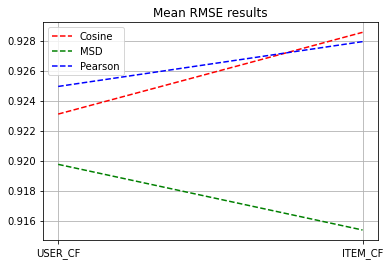

In [14]:
plt.figure()
plt.plot([0,1],similarity_df['Cosine'],'--r',label = 'Cosine')
plt.plot([0,1],similarity_df['MSD'],'--g',label = 'MSD')
plt.plot([0,1],similarity_df['Pearson'],'--b',label = 'Pearson')
plt.xticks([0,1],recommended_system)
plt.title("Mean RMSE results")
plt.legend()
plt.grid()
plt.show()

### Calculating Mean MAE for User based CF and Item based CF 

In [15]:
similarity = ["Cosine","MSD","Pearson"]
recommended_system = ["USER_CF","ITEM_CF"]
similarity_df_mae = pd.DataFrame(columns = similarity, index = recommended_system)
for i in range(6):
    sim = results_df["params"][i]["sim_options"]["name"]
    model = results_df["params"][i]["sim_options"]["user_based"]
    if(model == False):
        modeltype = "ITEM_CF"
    else:
        modeltype = "USER_CF"
    similarity_df_mae.loc[modeltype][sim] = results_df["mean_test_mae"][i]
print(similarity_df_mae) 

           Cosine       MSD   Pearson
USER_CF  0.707026  0.703618  0.705328
ITEM_CF  0.710737  0.700539  0.706701


### Plotting Mean MAE results for Cosine, Pearson and MSD

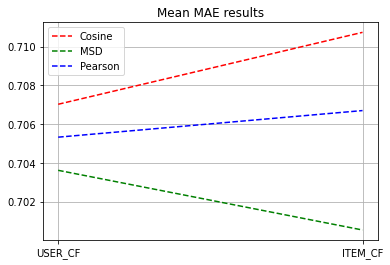

In [16]:
plt.figure()
plt.plot([0,1],similarity_df_mae['Cosine'],'--r',label = 'Cosine')
plt.plot([0,1],similarity_df_mae['MSD'],'--g',label = 'MSD')
plt.plot([0,1],similarity_df_mae['Pearson'],'--b',label = 'Pearson')
plt.xticks([0,1],recommended_system)
plt.title("Mean MAE results")
plt.legend()
plt.grid()
plt.show()

### Calculating Mean RMSE results for Cosine, Pearson and MSD by varying 'K' values

In [17]:
from surprise import KNNBasic
sim_options1 = {
    "name": "MSD",
    "user_based": True,
}
sim_options2 = {
    "name": "MSD",
    "user_based": False,
}
K_df = pd.DataFrame(index = recommended_system)
K_column = []
for i in range(7):
    K = 70*(i+1+i);
    K_column.append(K)
K_df = pd.DataFrame(columns = K_column, index = recommended_system)
for K in K_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = sim_options1), data, measures=['RMSE','MAE'], cv=5)
    K_df.loc["USER_CF"][K] = Krs['test_rmse'].mean()
for K in K_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = sim_options2), data, measures=['RMSE','MAE'], cv=5)
    K_df.loc["ITEM_CF"][K] = Krs['test_rmse'].mean()
K_df

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

,70,210,350,490,630,770,910
USER_CF,0.974445,0.977889,0.979422,0.978496,0.978484,0.978874,0.978087
ITEM_CF,0.931422,0.937022,0.940283,0.943202,0.944275,0.944999,0.945394


### Plotting Mean RMSE results for Cosine, Pearson and MSD by varying 'K' values

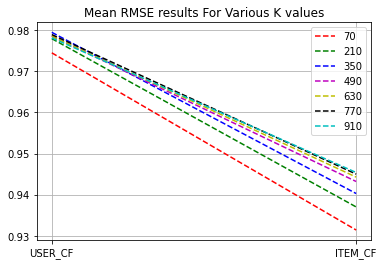

In [18]:
plt.figure()
count =0
for K in K_column:
    colour = ['r','g','b','m','y','k','c']
    prop = '--'+(colour[count%7])
    count = count +1
    plt.plot([0,1],K_df[K],prop, label = K)
    
plt.xticks([0,1],recommended_system)
plt.title("Mean RMSE results For Various K values")
plt.legend()
plt.grid()
plt.show()

### Calculating Mean RMSE results for Cosine, Pearson and MSD by varying 'K' values

In [19]:
from surprise import KNNBasic
sim_options1 = {
    "name": "MSD",
    "user_based": True,
}
sim_options2 = {
    "name": "MSD",
    "user_based": False,
}
K2_column = []
for i in range(7):
    K = 7*(i+1+i);
    K2_column.append(K)
K2_df = pd.DataFrame(columns = K2_column, index = recommended_system)
for K in K2_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = sim_options1), data, measures=['RMSE','MAE'], cv=5)
    K2_df.loc["USER_CF"][K] = Krs['test_rmse'].mean()
for K in K2_column:
    Krs = cross_validate(KNNBasic(k = K, sim_options = sim_options2), data, measures=['RMSE','MAE'], cv=5)
    K2_df.loc["ITEM_CF"][K] = Krs['test_rmse'].mean()
K2_df

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

,7,21,35,49,63,77,91
USER_CF,0.974395,0.963521,0.967233,0.969627,0.97248,0.975918,0.975896
ITEM_CF,0.996984,0.946833,0.936471,0.932564,0.931722,0.93203,0.931412


### Plotting Mean RMSE results for Cosine, Pearson and MSD by varying 'K' values

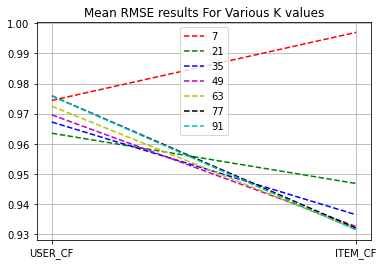

In [20]:
plt.figure()
count =0
for K in K2_column:
    colour = ['r','g','b','m','y','k','c']
    prop = '--'+(colour[count%7])
    count = count +1
    plt.plot([0,1],K2_df[K],prop, label = K)
    
plt.xticks([0,1],recommended_system)
plt.title("Mean RMSE results For Various K values")
plt.legend()
plt.grid()
plt.show()